In [1]:
import pandas as pd

In [2]:
movies=pd.read_csv("Movie-Ratings.csv")


In [3]:
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns=['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [7]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film=movies.Film.astype('category')

In [11]:
movies.Year=movies.Year.astype('category')

In [12]:
movies.Genre=movies.Genre.astype('category')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [14]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


----

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
sns.set_style("darkgrid")

In [18]:
#Jointplots

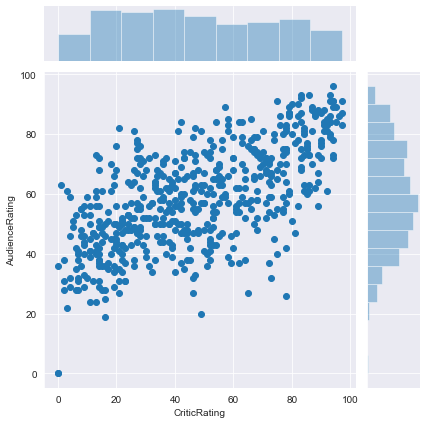

In [19]:
j=sns.jointplot(data=movies,x='CriticRating', y='AudienceRating')

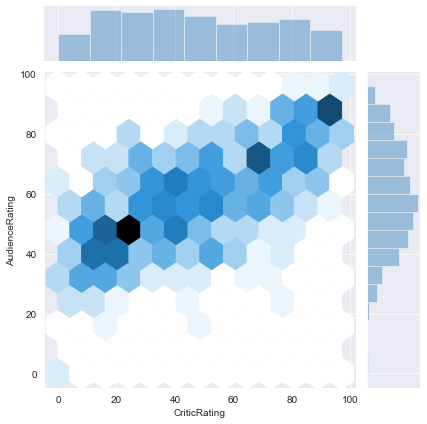

In [20]:
j=sns.jointplot(data=movies,x='CriticRating', y='AudienceRating', kind='hex')

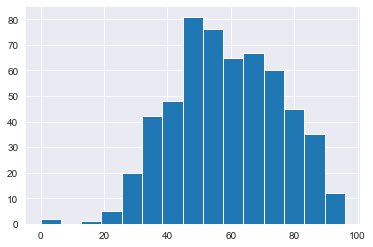

In [21]:
#histogram
n1=plt.hist(movies.AudienceRating, bins=15)

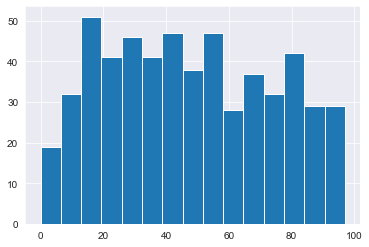

In [22]:
n1=plt.hist(movies.CriticRating, bins=15)

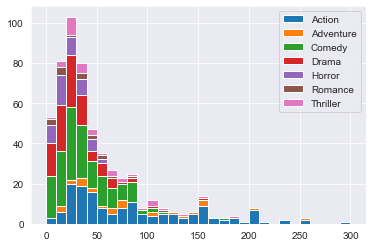

In [23]:
#Stacked Histogram

list1=list()
mylabels=list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1,bins=30,stacked=True,rwidth=1, label=mylabels)
plt.legend()
plt.show()

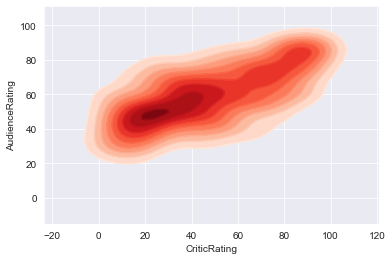

In [24]:
#KDE Plot

k1=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds')
k1b=sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Reds')


[(-20, 160)]

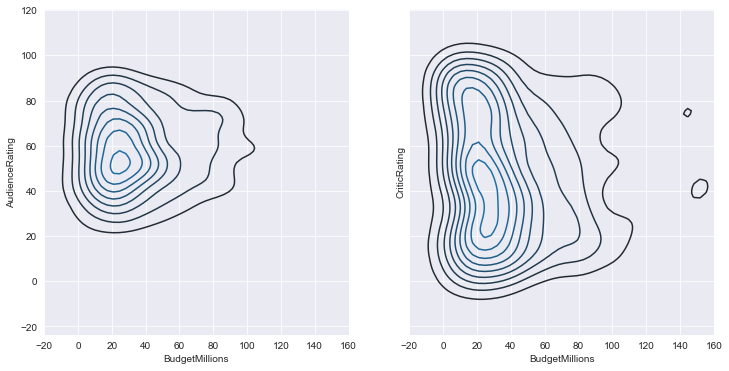

In [25]:
#subplots
f,axes=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1])
k1.set(xlim=(-20,160))

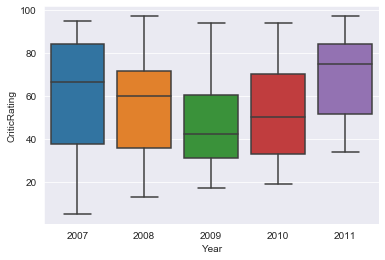

In [26]:
#boxplot
w=sns.boxplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

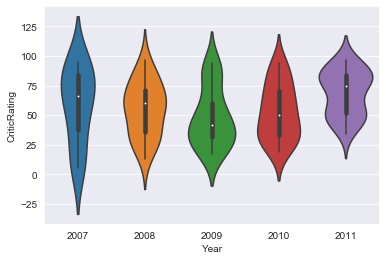

In [27]:
#violinplot
w=sns.violinplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

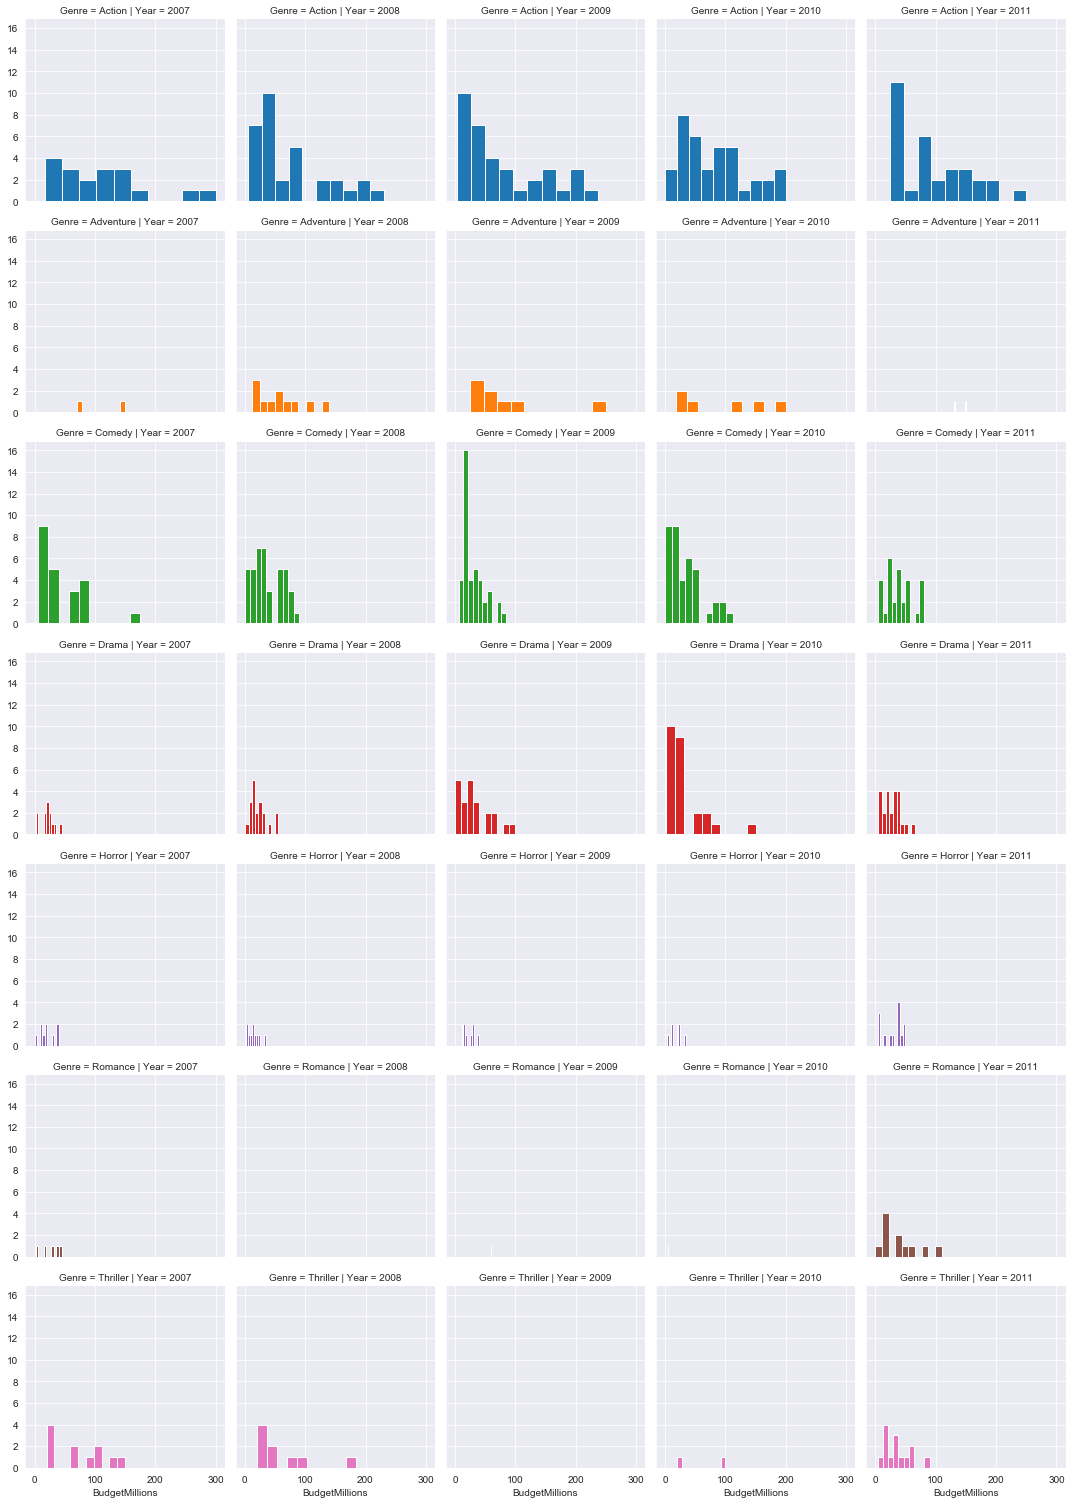

In [28]:
#histograms subplots
sns.set_style("darkgrid")
g=sns.FacetGrid(movies, row='Genre',col='Year',hue='Genre')
g=g.map(plt.hist,'BudgetMillions')

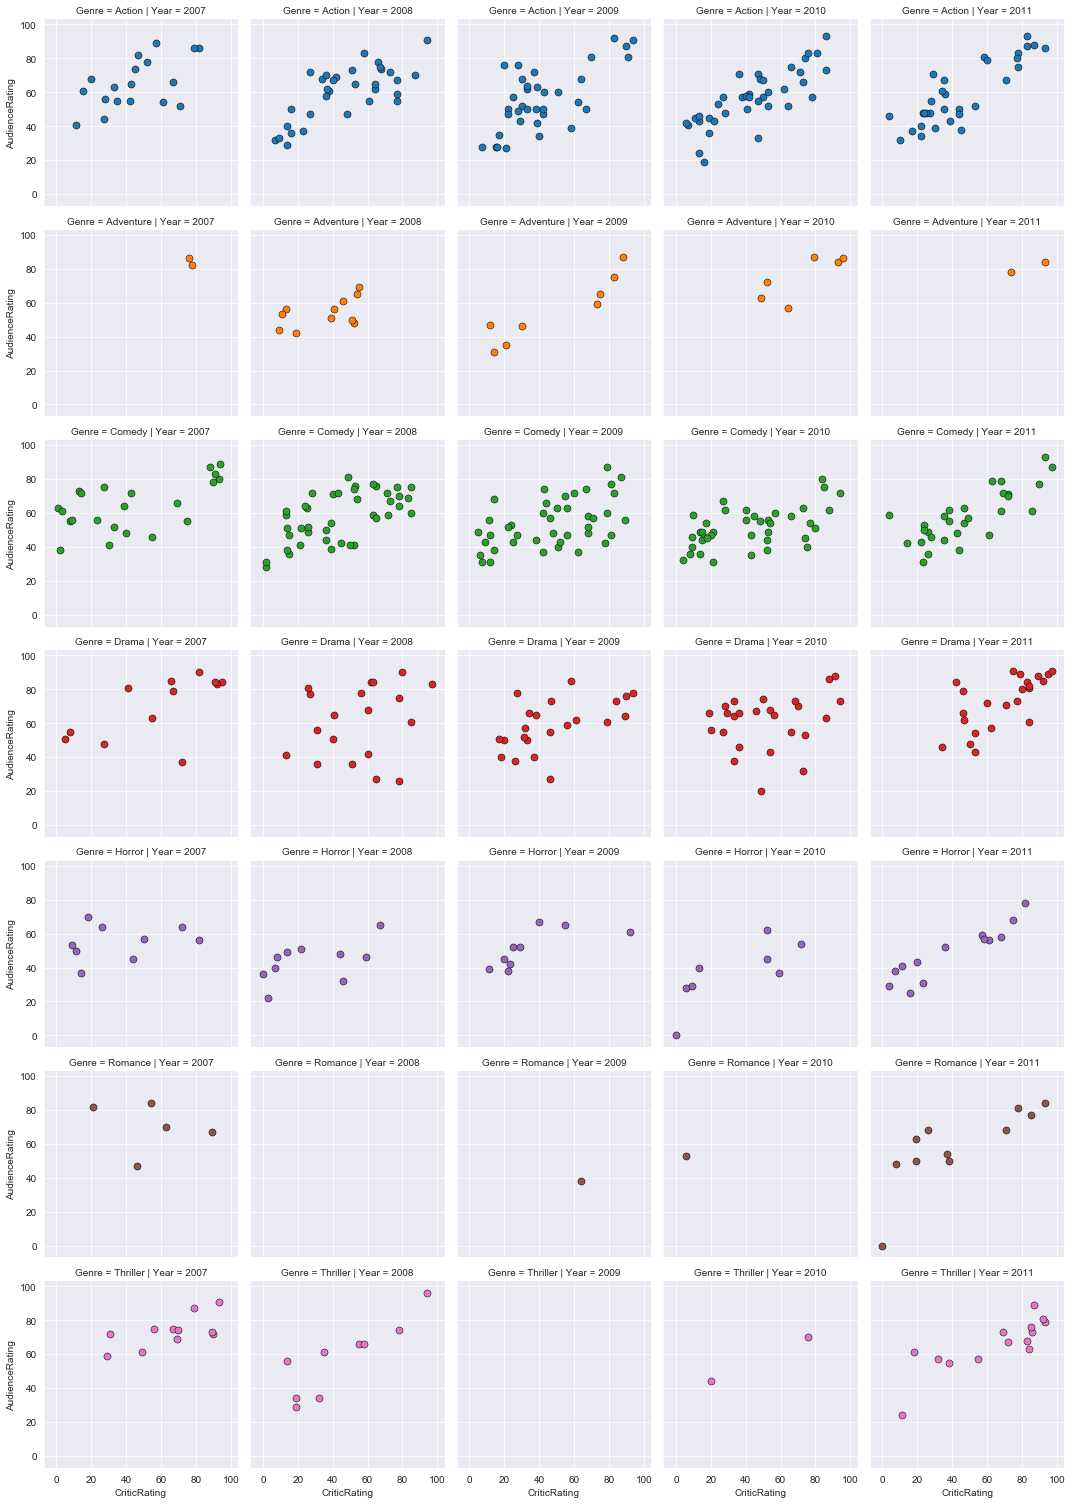

In [29]:
#Scatter subplots 
g=sns.FacetGrid(movies, row='Genre',col='Year',hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g=g.map(plt.scatter,'CriticRating','AudienceRating',**kws)

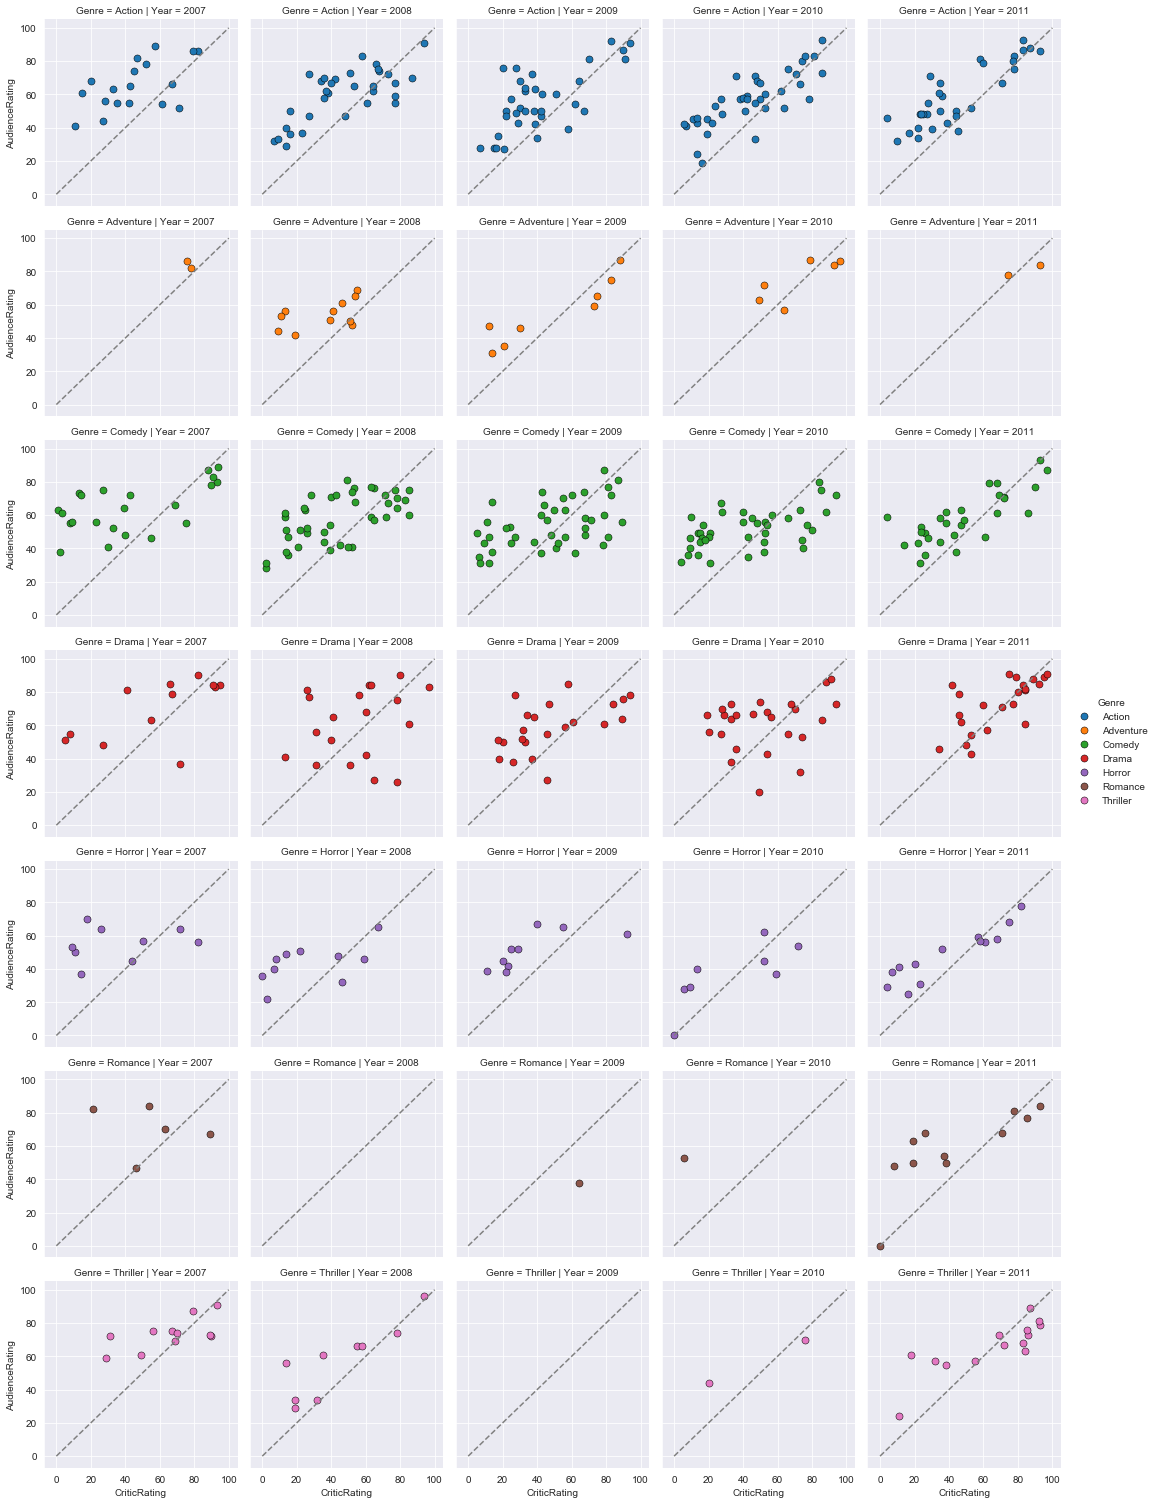

In [30]:
#Scatter subplots 
g=sns.FacetGrid(movies, row='Genre',col='Year',hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g=g.map(plt.scatter,'CriticRating','AudienceRating',**kws)
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c="gray",ls="--")
g.add_legend()
plt.show()

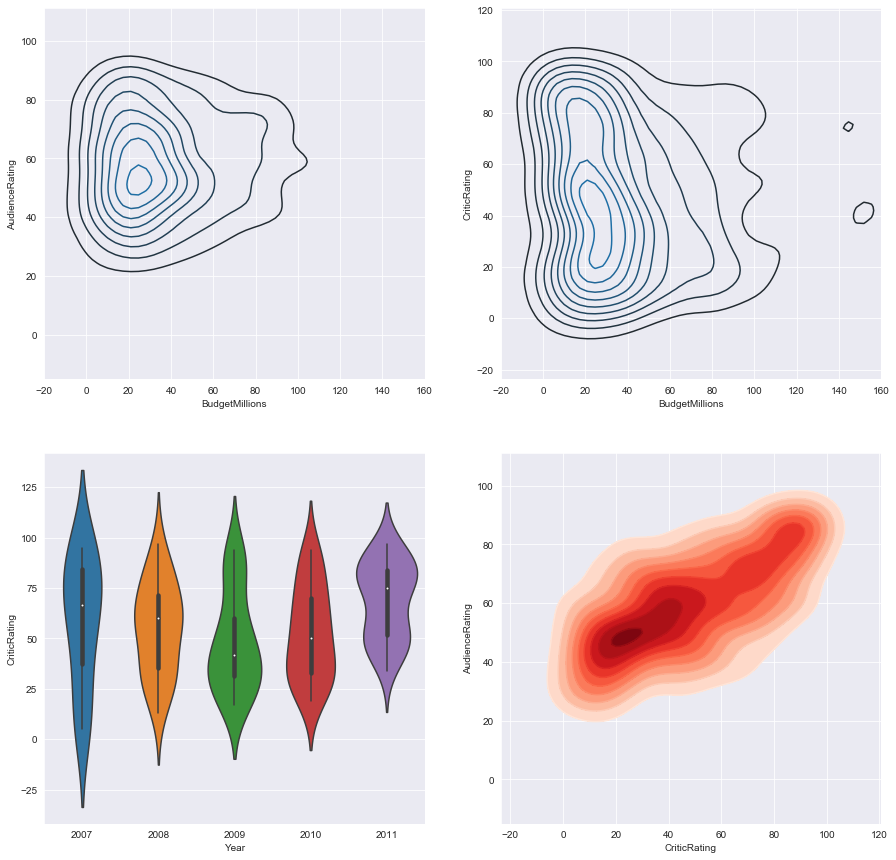

In [31]:
#dashboard
f,axes=plt.subplots(2,2,figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,1])
w=sns.violinplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating',ax=axes[1,0])
k4=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds',ax=axes[1,1])
k4b=sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Reds',ax=axes[1,1])
                 
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()



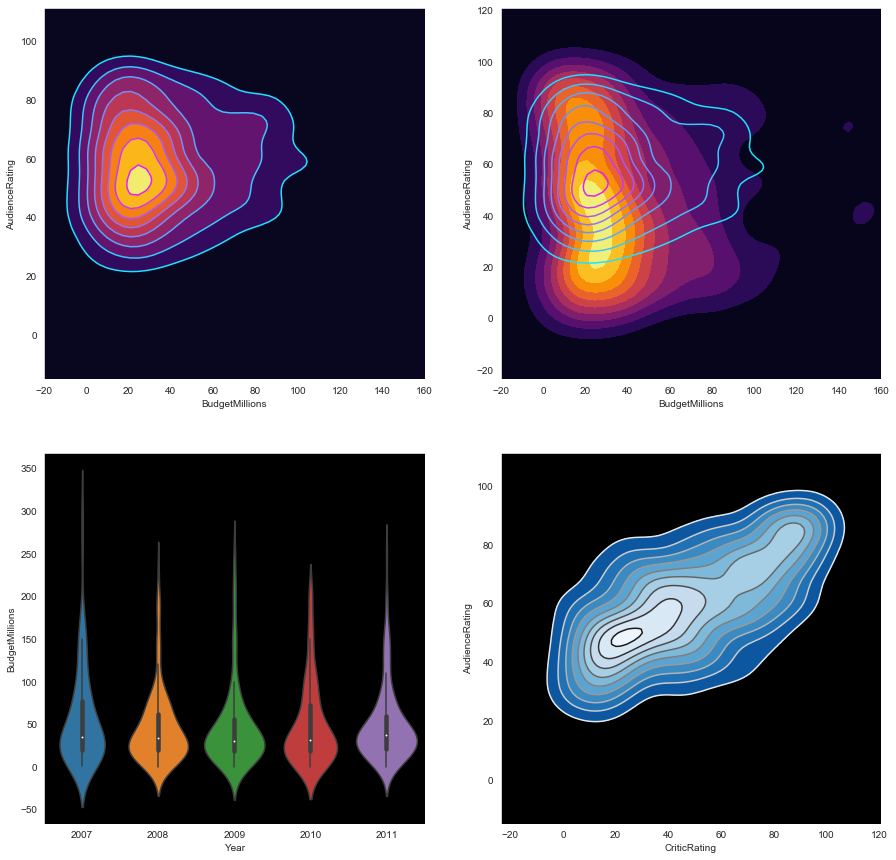

In [32]:
#thematic dashboard
sns.set_style("dark",{"axes.facecolor":"black"})

f,axes=plt.subplots(2,2,figsize=(15,15))

k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,\
               shade=True, shade_lowest=True,cmap='inferno',\
               ax=axes[0,0])
k1b=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,\
                cmap='cool',ax=axes[0,0])

k2=sns.kdeplot(movies.BudgetMillions,movies.CriticRating,\
               shade=True, shade_lowest=True,cmap='inferno',\
               ax=axes[0,1])
k2b=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,\
                cmap='cool',ax=axes[0,1])

w=sns.violinplot(data=movies,\
                 x='Year',y='BudgetMillions',ax=axes[1,0],\
                paletter='YlOrRd')

k4=sns.kdeplot(movies.CriticRating,movies.AudienceRating,\
               shade=True,shade_lowest=False,cmap='Blues_r',\
               ax=axes[1,1])
k4b=sns.kdeplot(movies.CriticRating,movies.AudienceRating,\
                cmap='gist_gray_r',ax=axes[1,1])
                 
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

